In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras import layers

In [9]:
df_NCAAdetailed = pd.read_csv('../Data/NCAATourneyDetailedResults.csv')
df_NCAAdetailed.head(10)
df_regDetailed = pd.read_csv('../Data/RegularSeasonDetailedResults.csv')
df_regDetailed.head(10)
df_final = pd.read_csv('../Data/finaldata.csv')
df_final.head()
# df_iris.tail()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,season,seed,teamid,confabbrev,teamname,firstd1season,lastd1season,daynum,score,wloc,...,ast,to,stl,blk,pf,win,tournament,ncaa_duration,conf_id,seed_num
0,2005,NaN,1272,cusa,Memphis,1985,2019,117,44,A,...,4,15,7,6,23,0,0,34,13,NaN
1,2018,NaN,1159,patriot,Colgate,1985,2019,37,76,H,...,10,9,6,2,20,0,0,34,28,NaN
2,2014,NaN,1231,big_ten,Indiana,1985,2019,113,58,H,...,5,10,2,3,20,0,0,34,9,NaN
3,2018,NaN,1370,wac,Seattle,2009,2019,11,46,H,...,8,14,5,4,18,0,0,10,35,NaN
4,2015,NaN,1416,aac,UCF,1985,2019,83,46,A,...,6,12,2,5,16,0,0,34,3,NaN


In [10]:
df_NCAAdetailed = df_NCAAdetailed[df_NCAAdetailed.Season > 2000]
df_NCAAdetailed.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [11]:
df_final.confabbrev.value_counts()

big_east      7052
a_ten         6856
sec           6621
acc           6566
cusa          6363
big_ten       6285
mac           5918
meac          5794
big_twelve    5771
sun_belt      5511
caa           5385
nec           5293
southern      5253
southland     5241
maac          5146
ovc           5116
mvc           4973
a_sun         4760
swac          4715
mwc           4601
horizon       4588
big_south     4477
big_sky       4453
aec           4387
wac           4308
big_west      4297
wcc           4274
patriot       4131
ivy           3549
summit        3002
pac_ten       2845
pac_twelve    2754
ind           2179
aac           1788
mid_cont      1224
gwc            702
Name: confabbrev, dtype: int64

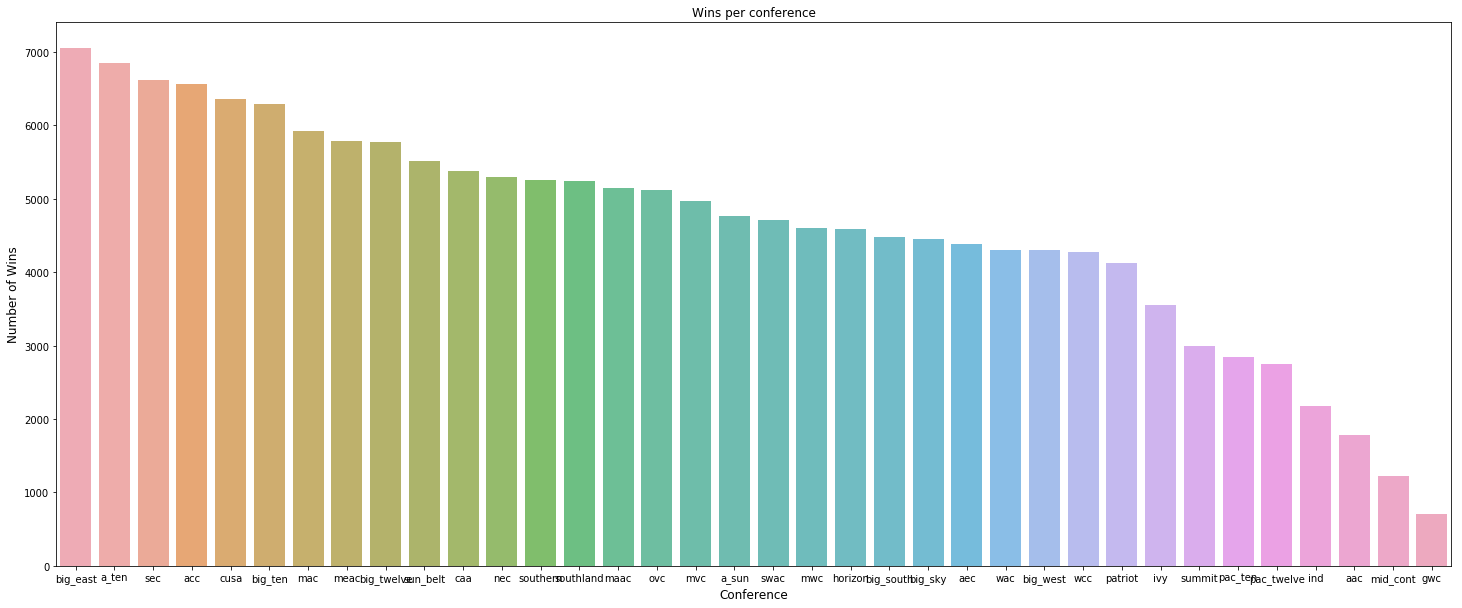

In [12]:
confrValues = df_final.confabbrev.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(confrValues.index, confrValues.values, alpha=0.8)
plt.title('Wins per conference')
plt.ylabel('Number of Wins', fontsize=12)
plt.xlabel('Conference', fontsize=12)
plt.show()

In [20]:
df_final = df_final[df_final.season > 2000]
df_final.head()

,season,seed,teamid,confabbrev,teamname,firstd1season,lastd1season,daynum,score,wloc,...,ast,to,stl,blk,pf,win,tournament,ncaa_duration,conf_id,seed_num
0,2005,NaN,1272,cusa,Memphis,1985,2019,117,44,A,...,4,15,7,6,23,0,0,34,13,NaN
1,2018,NaN,1159,patriot,Colgate,1985,2019,37,76,H,...,10,9,6,2,20,0,0,34,28,NaN
2,2014,NaN,1231,big_ten,Indiana,1985,2019,113,58,H,...,5,10,2,3,20,0,0,34,9,NaN
3,2018,NaN,1370,wac,Seattle,2009,2019,11,46,H,...,8,14,5,4,18,0,0,10,35,NaN
4,2015,NaN,1416,aac,UCF,1985,2019,83,46,A,...,6,12,2,5,16,0,0,34,3,NaN


In [27]:
normalized_data = df_final[['ftm', 'fgm', 'or', 'dr', 'ast']].apply(lambda z: (z - z.min()) / (z.max() - z.min()))
normalized_data['win'] = df_final['win']
normalized_data.tail(5)

,ftm,fgm,or,dr,ast,win
166173,0.083333,0.44,0.210526,0.448980,0.500,0
166174,0.416667,0.32,0.263158,0.326531,0.300,0
166175,0.208333,0.28,0.236842,0.489796,0.300,1
166176,0.500000,0.48,0.421053,0.612245,0.450,1
166177,0.583333,0.46,0.078947,0.306122,0.375,1


In [28]:
normalized_data.describe()

,ftm,fgm,or,dr,ast,win
count,166178.000000,166178.000000,166178.000000,166178.000000,166178.000000,166178.000000
mean,0.295414,0.365816,0.291507,0.399201,0.326997,0.500000
std,0.128225,0.097421,0.109910,0.104818,0.110113,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208333,0.300000,0.210526,0.326531,0.250000,0.000000
50%,0.291667,0.360000,0.289474,0.387755,0.325000,0.500000
75%,0.375000,0.420000,0.368421,0.469388,0.400000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#splitting into train and test datasets using numpy's randn
msk = np.random.rand(len(normalized_data)) < 0.8
train = normalized_data[msk]
test = normalized_data[~msk]
len(train)
len(test)

33172

In [32]:
X = train.values[:,:5]
X[:6]
targets = [[1,0],[0,1]]
y = np.array([targets[int(x)] for x in train.values[:,5:6]])
y[:6]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

In [36]:
#the neural network inputs and the length and width of the species
nninputs = len(X[0])
hidden_neurons = 6
np.random.seed(4)
weight_matrix = 2*np.random.random((nninputs, hidden_neurons)) - 1
weight_matrix

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101],
       [ 0.95254891, -0.98753949, -0.49403528, -0.13041694,  0.55876584,
        -0.60462985],
       [ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743],
       [-0.91167988,  0.91330594, -0.12770671,  0.89795461,  0.57261197,
         0.7325786 ],
       [-0.65366916, -0.85010283,  0.20148544, -0.66405563,  0.46676034,
        -0.18311228]])